# Calculate invalid pixel percentage

In [1]:
# Developer's setting
%load_ext autoreload
%autoreload 2

In [2]:
import glaft
import pandas as pd
# import numpy as np

In [3]:
# df = pd.read_csv('../manifest.csv', dtype=str)
df = pd.read_csv('../results_2022.csv', dtype=str)
df

,Date,Duration (days),Template size (px),Template size (m),Pixel spacing (px),Pixel spacing (m),Prefilter,Subpixel,Software,Vx,...,pt0_vydiff,pt0_vyavgdiff,pt1_vxdiff,pt1_vxavgdiff,pt1_vydiff,pt1_vyavgdiff,pt2_vxdiff,pt2_vxavgdiff,pt2_vydiff,pt2_vyavgdiff
0,Sen2-20180304-20180314,10,48,480,12,120,Gau,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,...,0.09593725498563105,0.08725667293912226,0.005894817186356094,0.013707317186356094,0.08222490098124796,0.08222490098124796,0.5122103172194441,0.5469325261961897,0.8053853176141387,0.7776075265908843
1,Sen2-20180304-20180314,10,48,480,12,120,NAOF,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,...,0.005945251783534833,-0.007943643728092364,0.017465313984259878,0.01833336622844628,0.06254539777915175,0.06601762165705855,NaN,1.3050308140173479,NaN,3.134664068272516
2,Sen2-20180304-20180314,10,48,480,12,120,None,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,...,-0.11824361153824509,-0.11650750704987228,-0.15324545062200834,-0.15498156256096174,0.14929403445737183,0.14234958670155823,3.65775754941108,3.5466463853180623,-3.2525455489097377,-3.5824067130027553
3,Sen2-20180304-20180314,10,48,480,1,10,Gau,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,...,0.004437340518086974,0.021798445006459777,0.0010556991207103517,0.0010556991207103517,0.05322498651370389,0.05322498651370389,0.5698711991537984,0.54903788568868,0.7138854031465945,0.6756909851931033
4,Sen2-20180304-20180314,10,48,480,1,10,NAOF,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,...,-0.052411586626994466,-0.052411586626994466,0.022108991871400696,0.018636767993493897,0.058876059368622446,0.058876059368622446,5.653424491904489,0.7315494919044887,-5.4367135239984865,-5.4210885239984865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Sen2-20180508-20180627,50,64,640,8,80,Gau,pyrUP,autoRIFT,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,...,0.029926568197736647,0.02437105767680159,0.644148991456472,0.6469267467169395,-0.2050530099843646,-0.198108562228551,NaN,NaN,NaN,NaN
168,Sen2-20180508-20180627,50,32,320,4,40,NAOF,pyrUP,autoRIFT,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,...,-0.04855619958056612,-0.040222874194518754,0.5210358241425317,0.5502024629936975,-0.22103582246615094,-0.2363136105091731,NaN,NaN,NaN,NaN
169,Sen2-20180508-20180627,50,32,320,8,80,NAOF,pyrUP,autoRIFT,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,...,-0.04351746025196346,-0.031017472172892413,0.546999003436041,0.5567212362546445,-0.22849708611778052,-0.2423860114317301,NaN,NaN,NaN,NaN
170,Sen2-20180508-20180627,50,64,640,4,40,NAOF,pyrUP,autoRIFT,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,...,-0.0371064293977863,-0.03432867413731877,0.5345860301178939,0.5401415406388289,-0.2595860493031389,-0.2665304672566301,NaN,NaN,NaN,NaN


In [4]:
for idx, row in df.iterrows():
    # print(row.Vx)
    if row.Software == 'Vmap':
        print('yes')
        exp = glaft.Velocity(vxfile=row.Vx, vyfile=row.Vy, nodata=0)
    else:
        exp = glaft.Velocity(vxfile=row.Vx, vyfile=row.Vy)
    exp.cal_invalid_pixel_percent()
    df.loc[idx, 'Invalid-pixel-percent'] = exp.invalid_percent * 100

Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_invalid_pixel_percent
Running cal_in

In [5]:
df.to_csv('../results_2022.csv', index=False)
# df

In [27]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [46]:
tmpx = '/home/jovyan/Projects/PX_comparison/PX/Vmap/parabolic_subpixel/noprefilter/T07VFH_20180508T204021_B04_s__T07VFH_20180627T204021_B04_s_vmap_minm_31px_spm1-F_vx.tif'
tmpy = '/home/jovyan/Projects/PX_comparison/PX/Vmap/parabolic_subpixel/noprefilter/T07VFH_20180508T204021_B04_s__T07VFH_20180627T204021_B04_s_vmap_minm_31px_spm1-F_vy.tif'

In [58]:
with rasterio.open(tmpx) as srcx:
    print(srcx.nodatavals)
    vx_noclip = srcx.read(1)

(0.0,)


In [42]:
vx_noclip.shape

(3720, 4158)

In [41]:
vx_noclip

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
vx_noclip == 0

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [30]:
in_shp = '../../data/shapefiles/bedrock_V1.shp'

In [47]:
exp = glaft.Velocity(vxfile=tmpx, vyfile=tmpy, static_area=in_shp, nodata=0)

In [49]:
exp.static_terrain_analysis()

Running clip_static_area


/home/jovyan/Projects/Github/GLAFT/glaft/metrics.py:164: UserWarning: NoData values other than -9999 has not implemented yet. Falling back to -9999.
  warnings.warn("NoData values other than -9999 has not implemented yet. Falling back to -9999.")


Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running cal_outlier_percent


In [57]:
exp.xy[0, :]

array([ 0.05575006,  0.47064772,  0.1825832 , ..., -0.12997177,
        0.02469868,  0.03218165], dtype=float32)

In [61]:
aaa = exp._clip(gtiff=exp.vxfile, shp=exp.static_area, nodata=-9999.0)

In [62]:
aaa

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

In [64]:
np.sum(aaa > -9998)

202774

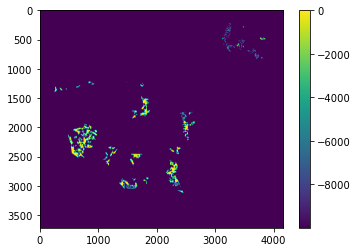

In [63]:
plt.imshow(aaa)
# plt.clim(-2, 2)
plt.colorbar()